In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb


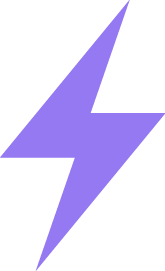

Running local mode, some functionality limited.



In [2]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [3]:
sixtycities = pd.read_csv('60cities.csv')

In [4]:
sixtycities.head()

,Name,State,Population rank (core city),Population rank (Primary Statistical Area),Distance to closest larger American city (KM),Power,Population Primary Statistical Area,Population PSAPower,Rolling population total,"Politics 1 for Democrat, -1 for Republican, 2 for swing",...,Current AMTRAK service?,Score Rank,Population PSA Rank,Number of Routes,Number of trains,Missing railroad?,Note,Longitude,Latitude,wrong
0,New York,New York,1.0,1,20000,20000.0,23362099,467241980000,23362099,1,...,yes,1,1,7,NaN,NaN,NaN,40.70,-74.00,74.00
1,Los Angeles,California,2.0,2,4000,2000.0,18238998,72955992000,41601097,1,...,yes,2,2,5,NaN,NaN,NaN,34.00,-118.25,118.25
2,Chicago,Illinois,3.0,3,1200,400.0,9899902,11879882400,51500999,1,...,yes,3,3,14,NaN,NaN,NaN,42.00,-87.75,87.75
3,Washington/Baltimore,DC,24.0,4,370,92.5,9331587,3452687190,60832586,1,...,yes,7,9,5,NaN,NaN,NaN,39.00,-77.00,77.00
4,San Jose/San Francisco,California,10.0,5,500,100.0,8370967,4185483500,69203553,1,...,yes,6,8,2,NaN,NaN,NaN,37.75,-122.50,122.50


In [5]:
X = sixtycities[['Latitude','Longitude']]
x = sixtycities['Latitude']

In [6]:
y = sixtycities['Longitude']
labels = sixtycities['Name']

In [7]:
lgn.scatter(x, y, labels = sixtycities['Name'])

# DBSCAN

In [8]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2, min_samples = 2)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
    min_samples=2, n_jobs=1, p=None)

In [9]:
labels = dbscan.labels_
print(labels) # comprehension: what do these mean? How many are there?
# Observations that did not make it into a DB qualified cluster will recieve the label of -1

[ 0  1  2  3  4  0  0 -1  5 -1 -1  6 -1  7 -1  6 -1  1 -1  5 -1  5 -1  4  8
 -1 -1  6  6 -1  9  6  2  8 -1  9  3  8  5  0  6 -1 -1  8 -1 10 -1  3  3 11
 11  0 -1 10 -1  8  6 -1  7  5]


In [10]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print n_clusters_

12


In [11]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.136


In [12]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Estimated number of clusters: 12
Homogeneity: 0.514
Completeness: 0.845
V-measure: 0.639


In [13]:
import numpy as np
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscan.core_sample_indices_] = True 
print(core_samples)

[ True  True  True  True  True  True  True False  True False False  True
 False  True False  True False  True False  True False  True False  True
  True False False  True  True False  True  True  True  True False  True
  True  True  True  True  True False False  True False  True False  True
  True  True  True  True False  True False  True  True False  True  True]


/home/matthew/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


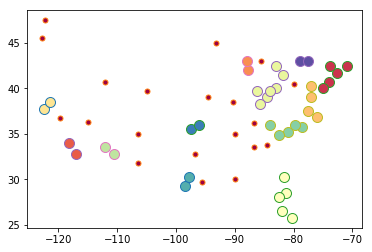

In [14]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = X.loc[class_member_mask & core_samples, :]
    plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = X.loc[class_member_mask & ~core_samples, :]
    plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)
    
plt.show()

In [15]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

Silhouette Coefficient: 0.136
Estimated number of clusters: 12
Homogeneity: 0.514
Completeness: 0.845
V-measure: 0.639
[ True  True  True  True  True  True  True False  True False False  True
 False  True False  True False  True False  True False  True False  True
  True False False  True  True False  True  True  True  True False  True
  True  True  True  True  True False False  True False  True False  True
  True  True  True  True False  True False  True  True False  True  True]


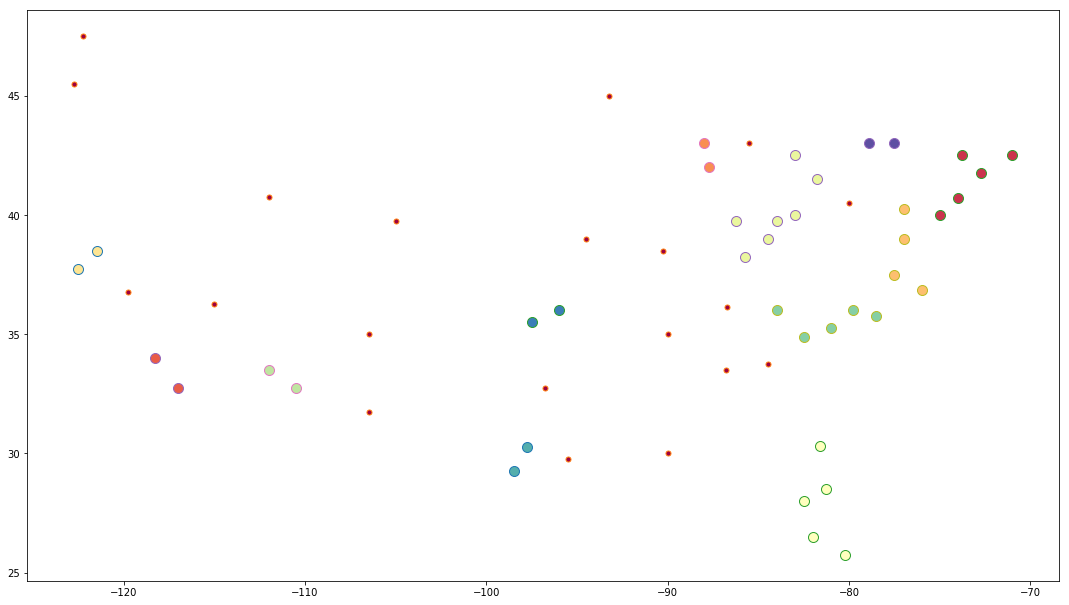

In [16]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.345
Estimated number of clusters: 7
Homogeneity: 0.379
Completeness: 0.875
V-measure: 0.528
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True  True  True False  True  True  True
  True False False  True  True False  True  True  True  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
  True  True  True  True False  True  True  True  True False  True  True]


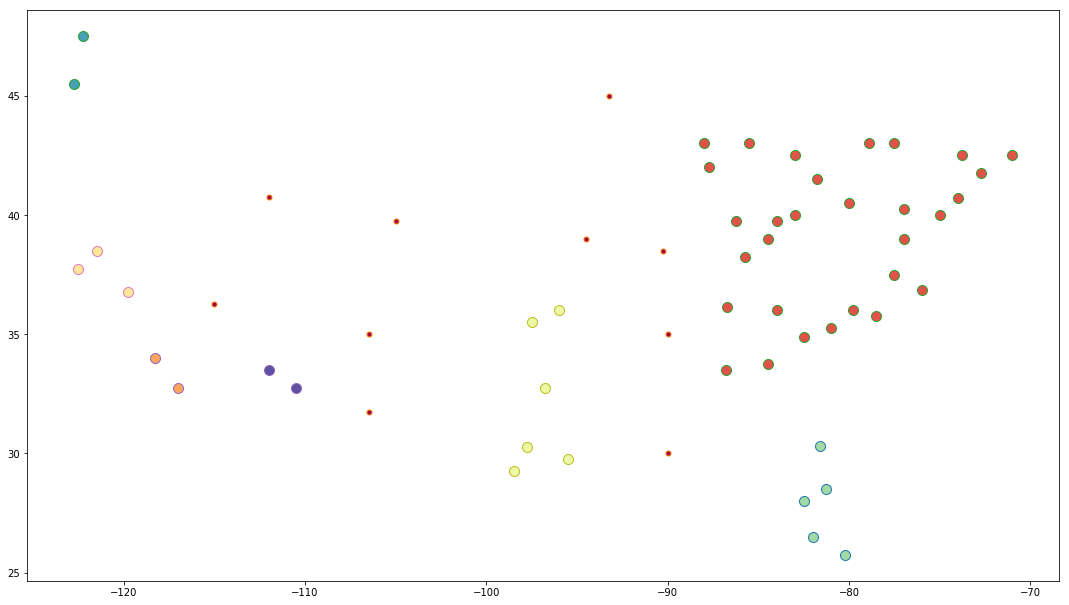

In [17]:
dbscanner(x, y, 3, 2)

Silhouette Coefficient: 0.348
Estimated number of clusters: 7
Homogeneity: 0.373
Completeness: 0.861
V-measure: 0.521
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True  True  True False  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


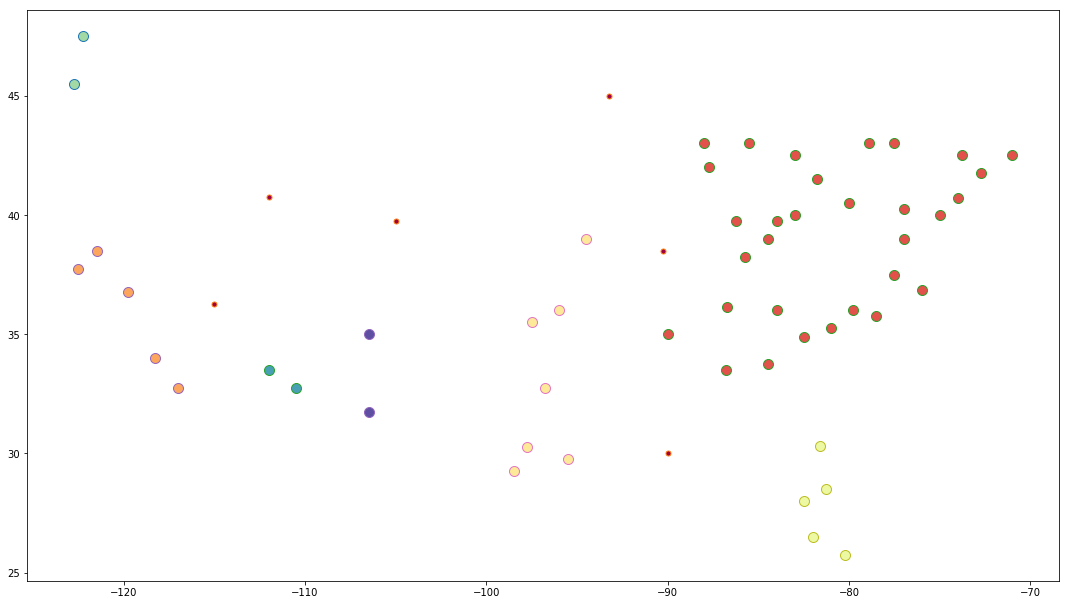

In [18]:
dbscanner(x, y, 3.5, 2)

Silhouette Coefficient: 0.406
Estimated number of clusters: 3
Homogeneity: 0.171
Completeness: 0.824
V-measure: 0.283
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


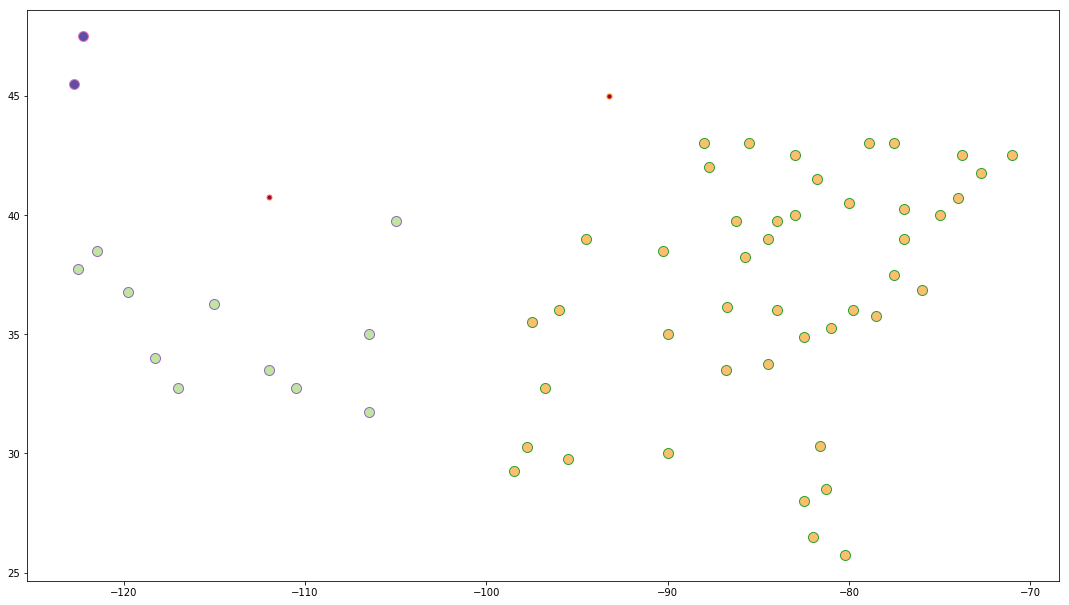

In [19]:
dbscanner(x, y, 5, 2)

In [20]:
lgn.scatter(x, y, labels = sixtycities['Name'])

# 100 largest cities

In [21]:
hundred = pd.read_csv('100cities.csv')

In [22]:
X = hundred[['Latitude','Longitude']]
x = hundred['Latitude']

In [23]:
y = hundred['Longitude']

In [24]:
lgn.scatter(x, y, labels = hundred['Name'])

Silhouette Coefficient: 0.194
Estimated number of clusters: 11
Homogeneity: 0.430
Completeness: 0.793
V-measure: 0.558
[ True  True  True  True  True  True  True False  True False  True  True
 False  True False  True  True  True False  True False  True  True  True
  True False False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True False  True  True False False  True  True  True  True False  True
  True False False  True  True  True  True False False  True  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True  True  True]


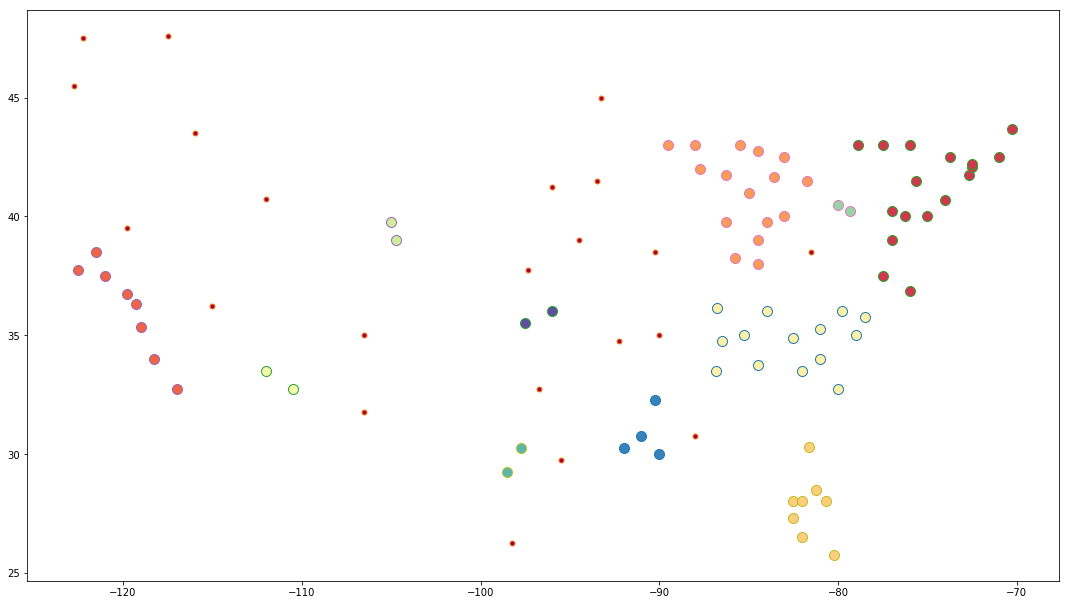

In [25]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.244
Estimated number of clusters: 8
Homogeneity: 0.291
Completeness: 0.781
V-measure: 0.424
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


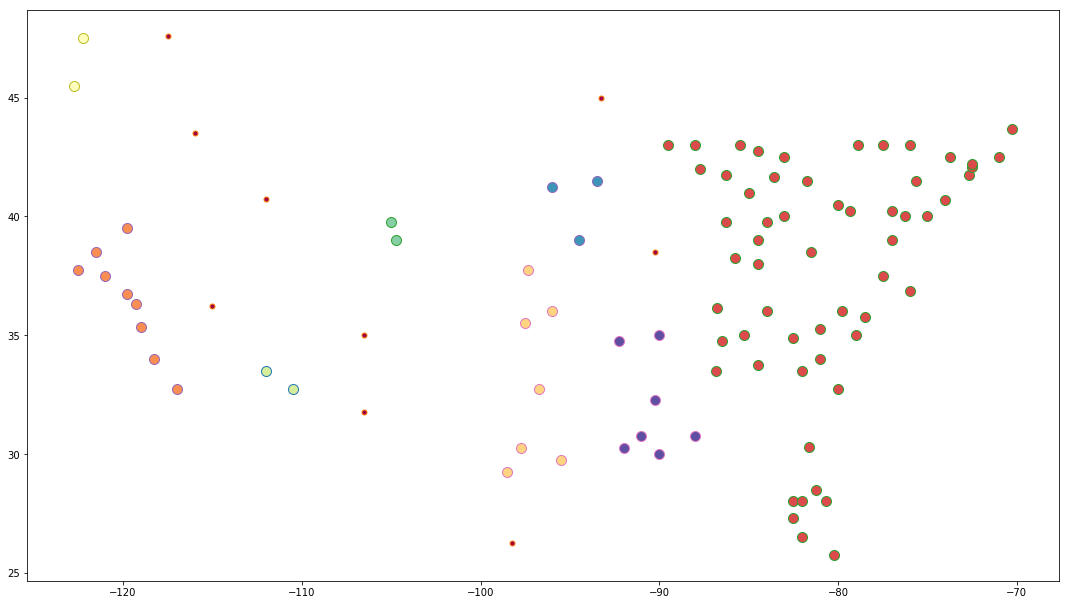

In [26]:
dbscanner(x, y, 3, 2)

## Every city in the US and Canada

In [27]:
everycity = pd.read_csv('usandcanada.csv')

In [28]:
everycity = everycity[['Name', 'Longitude', 'Latitude','Population Primary Statistical Area']]
everycity = everycity.dropna()
everycity.head()

,Name,Longitude,Latitude,Population Primary Statistical Area
0,New York,40.70,74.00,23362099
1,Los Angeles,34.00,118.25,18238998
2,Chicago,42.00,87.75,9899902
3,Washington/Baltimore,39.00,77.00,9331587
4,San Jose/San Francisco,37.75,122.50,8370967


In [29]:
everycity['Latitude'] = everycity['Latitude'] * -1

In [30]:
everycity['Population'] = everycity['Population Primary Statistical Area']

In [31]:
everycity = everycity.dropna()

In [32]:
everycity.head()

,Name,Longitude,Latitude,Population Primary Statistical Area,Population
0,New York,40.70,-74.00,23362099,23362099
1,Los Angeles,34.00,-118.25,18238998,18238998
2,Chicago,42.00,-87.75,9899902,9899902
3,Washington/Baltimore,39.00,-77.00,9331587,9331587
4,San Jose/San Francisco,37.75,-122.50,8370967,8370967


In [33]:
everycity.tail()

,Name,Longitude,Latitude,Population Primary Statistical Area,Population
210,New Bern,35.10,-77.00,195751,195751
211,Hilton Head,32.16,-80.75,193882,193882
212,Fairmont,39.50,-80.15,190842,190842
213,Elmira,42.10,-76.80,187974,187974
275,Quincy,40.00,-91.40,116393,116393


In [34]:
everycity.dtypes

Name                                    object
Longitude                              float64
Latitude                               float64
Population Primary Statistical Area      int64
Population                               int64
dtype: object

In [35]:
largecities = everycity
largecities = largecities.loc[largecities['Population'] >= 500000]

In [36]:
largecities.tail()

,Name,Longitude,Latitude,Population Primary Statistical Area,Population
108,Kalamazoo,42.25000,-85.60,525929,525929
109,Kitchener-Cambridge-Waterloo,43.45000,-80.48,523894,523894
110,Savannah,32.00000,-81.00,516154,516154
111,Corpus Christi,27.75000,-97.50,511319,511319
112,Johnson City,36.33333,-82.33,509690,509690


In [37]:
X = everycity[['Latitude','Longitude']]
x = everycity['Latitude']
y = everycity['Longitude']

In [38]:
lgn.scatter(x, y, labels = everycity['Name'])

Silhouette Coefficient: 0.271
Estimated number of clusters: 6
Homogeneity: 0.134
Completeness: 0.790
V-measure: 0.229
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True

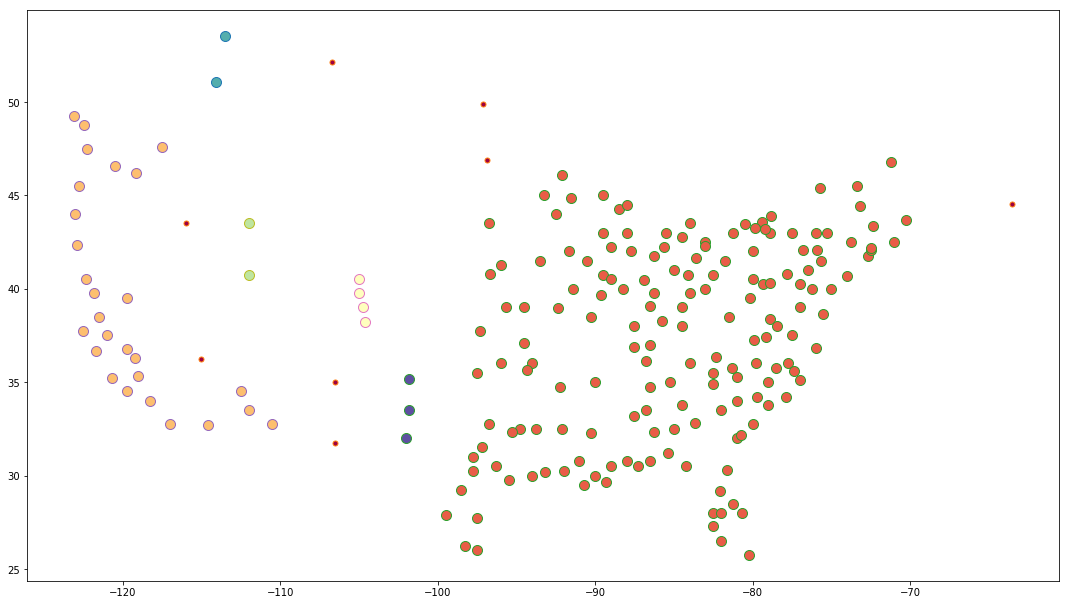

In [39]:
dbscanner(x, y, 3, 2)

In [40]:
X = largecities[['Latitude','Longitude']]
x = largecities['Latitude']
y = largecities['Longitude']

In [41]:
lgn.scatter(x, y, labels = largecities['Name'])

Silhouette Coefficient: 0.265
Estimated number of clusters: 9
Homogeneity: 0.290
Completeness: 0.804
V-measure: 0.426
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


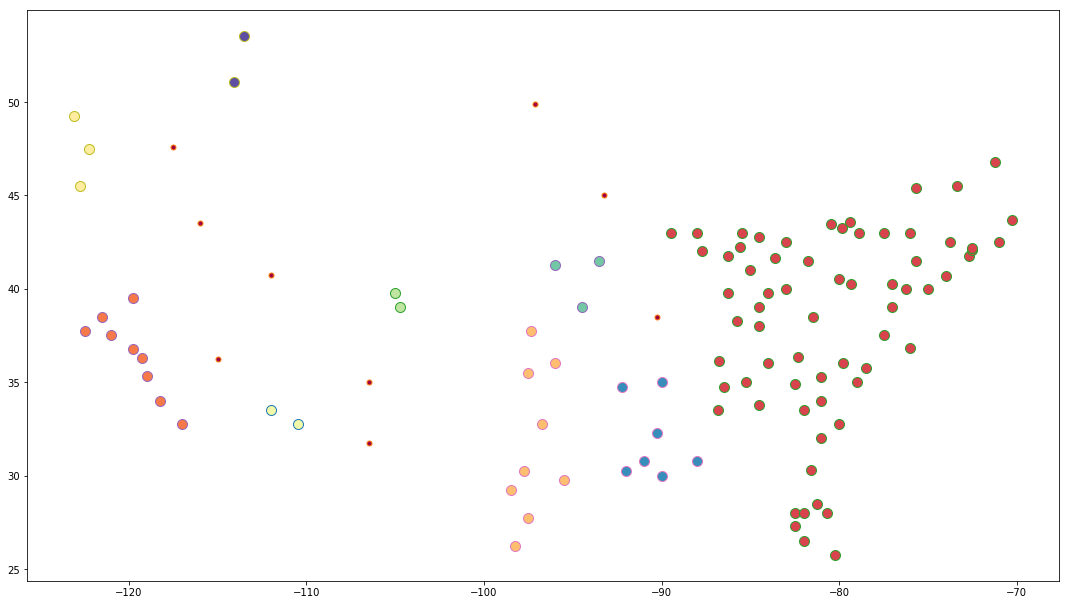

In [42]:
dbscanner(x, y, 3, 2)

Silhouette Coefficient: 0.417
Estimated number of clusters: 7
Homogeneity: 0.177
Completeness: 0.806
V-measure: 0.290
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


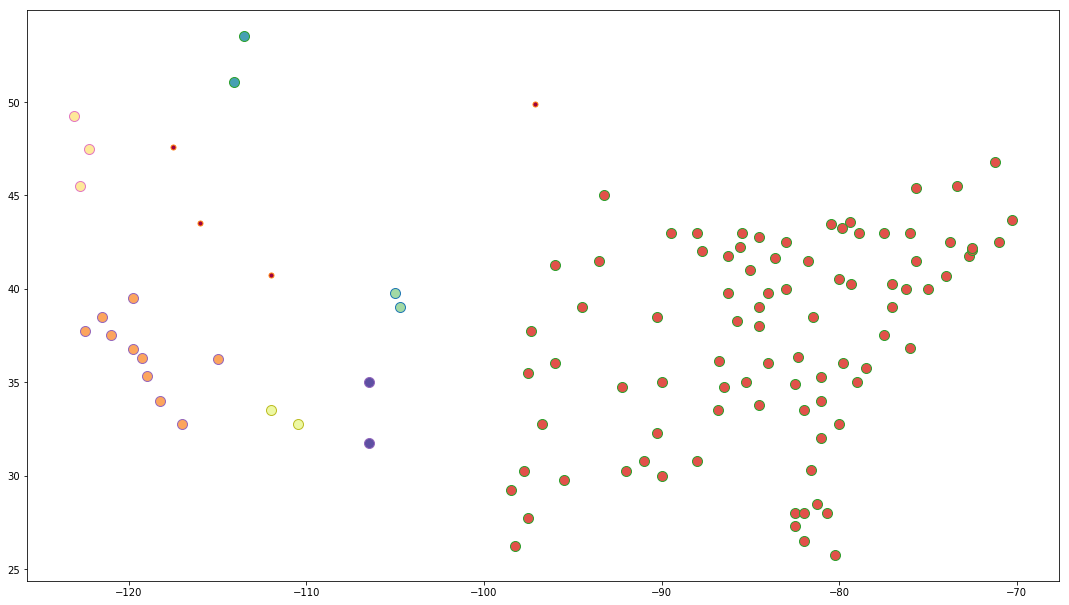

In [43]:
dbscanner(x, y, 4, 2)

In [44]:
megacities = everycity.loc[everycity['Population'] >= 1000000]

In [45]:
megacities.tail()

,Name,Longitude,Latitude,Population Primary Statistical Area,Population
60,Fresno,36.75,-119.75,1100113,1100113
61,Knoxville,36.00,-84.00,1091370,1091370
62,Dayton,39.75,-84.00,1079417,1079417
63,El Paso,31.75,-106.50,1045180,1045180
64,Tucson,32.75,-110.50,1039697,1039697


In [46]:
X = megacities[['Latitude','Longitude']]
x = megacities['Latitude']
y = megacities['Longitude']

In [47]:
lgn.scatter(x, y, labels = megacities['Name'])

Silhouette Coefficient: 0.089
Estimated number of clusters: 13
Homogeneity: 0.507
Completeness: 0.856
V-measure: 0.637
[ True  True  True  True  True  True  True False False False False  True
  True  True  True False False  True False  True False  True False  True
 False  True  True  True False False  True  True False  True  True  True
  True False  True  True  True  True  True  True False False False  True
 False  True False False False  True  True  True  True  True False  True
 False  True  True False  True]


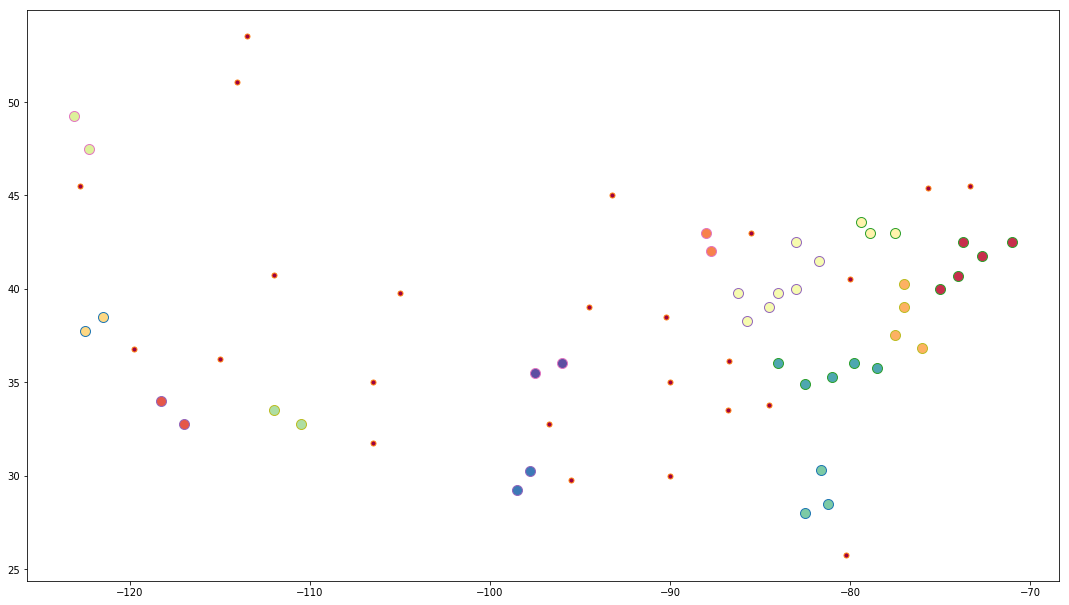

In [48]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.347
Estimated number of clusters: 8
Homogeneity: 0.382
Completeness: 0.875
V-measure: 0.532
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True  True  True False  True
  True  True  True  True False False  True  True False  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True]


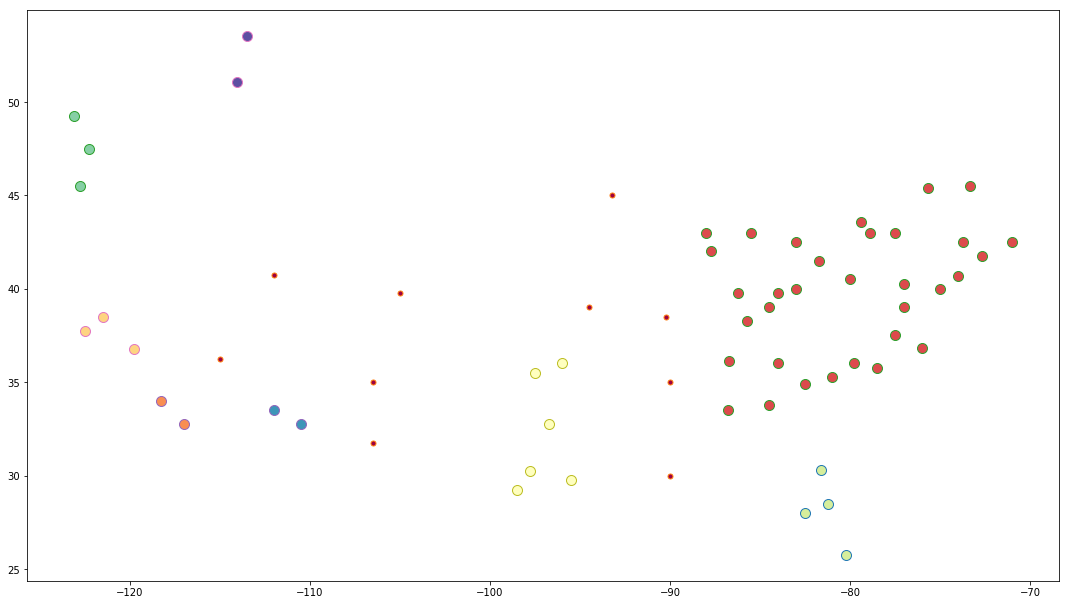

In [49]:
dbscanner(x, y, 3, 2)

# Including  Mexico

In [50]:
america = pd.read_csv('uscamex.csv')

In [51]:
america = america[['Name','Population','Latitude','Longitude']].dropna(axis = 0)

In [52]:
america

,Name,Population,Latitude,Longitude
0,Panama City,1713070,9.000000,79.150000
1,San Jose,2158898,9.900000,84.100000
2,Masaya,139701,12.000000,86.100000
3,Managua,1337709,12.150000,86.250000
4,Leon,389600,12.450000,86.900000
5,San Salvador,1767102,13.700000,89.200000
6,Santa Ana,290000,14.000000,89.500000
7,Tegucigalpa,1126534,14.100000,87.200000
8,Guatemala city,4500000,14.600000,90.540000
9,Quetzaltenango,661375,14.850000,91.500000


In [53]:
america['Longitude'] = america['Longitude'] * -1
america.describe()

,Latitude,Longitude
count,404.000000,404.000000
mean,36.103123,-93.747127
std,9.378830,14.834525
min,9.000000,-124.150000
25%,30.825000,-102.737500
50%,37.875000,-91.833300
75%,43.000000,-82.075000
max,55.150000,-52.700000


In [54]:
americamega = america.loc[america['Population'] >= 1000000]

In [55]:
X = americamega[['Longitude','Latitude']]
x = americamega['Latitude']
y = americamega['Longitude']

In [56]:
lgn.scatter(y, x, labels = americamega['Name'])

Silhouette Coefficient: -0.055
Estimated number of clusters: 24
Homogeneity: 0.308
Completeness: 0.893
V-measure: 0.458
[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  Tr

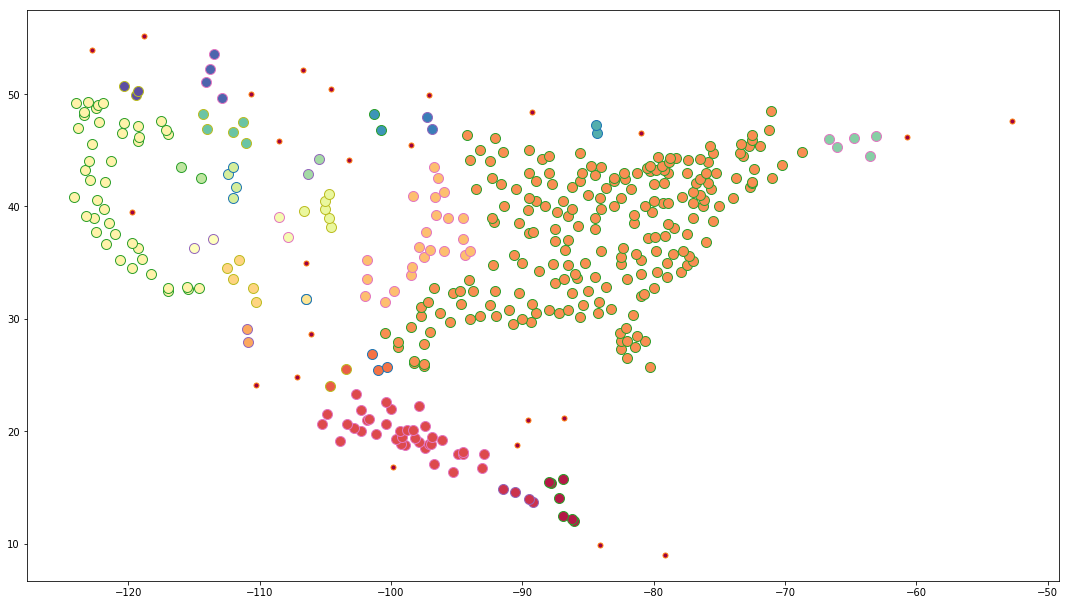

In [57]:
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.125
Estimated number of clusters: 6
Homogeneity: 0.146
Completeness: 0.981
V-measure: 0.255
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True

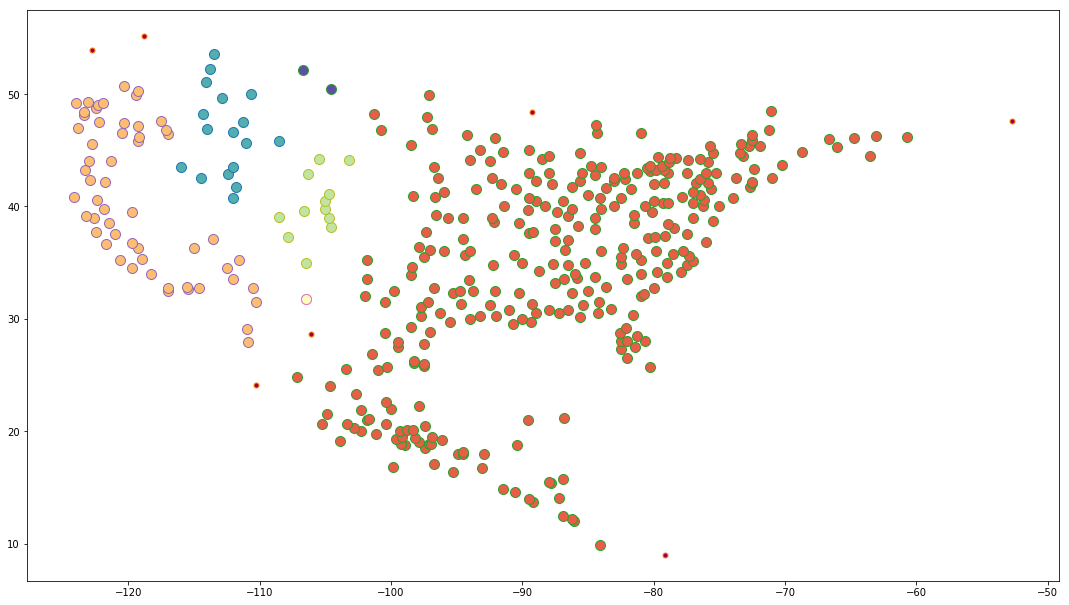

In [58]:
dbscanner(x, y, 3, 2)

Silhouette Coefficient: 0.412
Estimated number of clusters: 1
Homogeneity: 0.009
Completeness: 0.938
V-measure: 0.018
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True

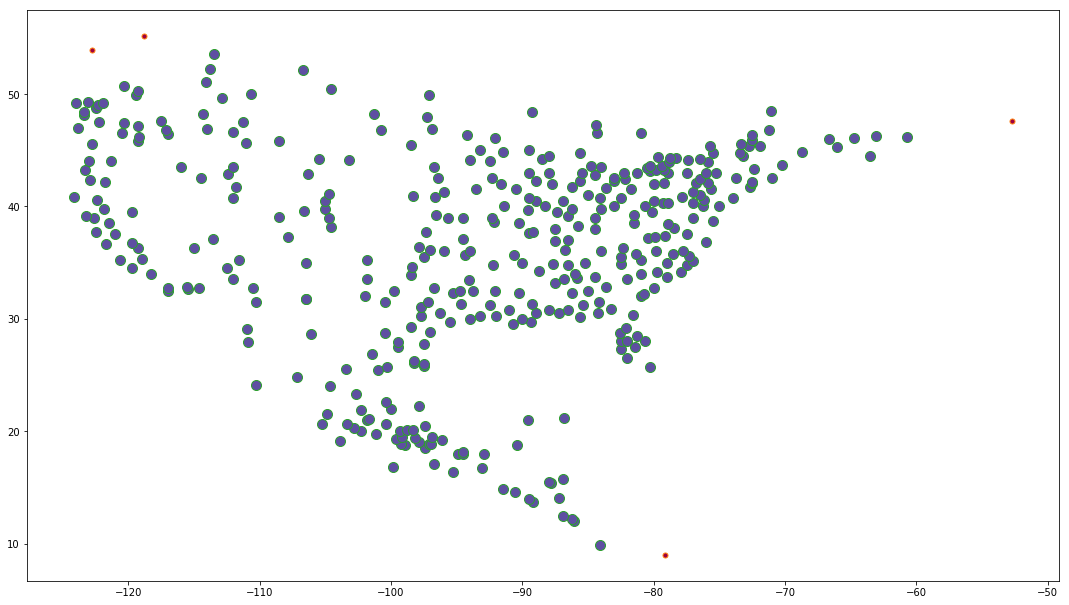

In [59]:
dbscanner(x, y, 4, 2)

# North America

In [60]:
america = pd.read_csv('northamericacomplete.csv')

In [61]:
america.head()

,Name,State/Estado/Province,Country,Distance to closest larger city (KM),60 cities Region 190 km,60 cities Region 380 km,60 cities Region 475 km,100 cities Region 190 km,Population Rank,Rank Power,...,Score Rank,Population PSA Rank,Number of Routes,Number of trains,Missing railroad?,Note,Latitude,Longitude,Population city proper,Included
0,St. John's,Newfoundland and Labrador,Canada,inaccessible,NaN,NaN,NaN,NaN,274,#VALUE!,...,NaN,NaN,NaN,NaN,NaN,NaN,47.550,52.700,NaN,NaN
1,Conception Bay South,Newfoundland and Labrador,Canada,NaN,NaN,NaN,NaN,NaN,642,0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.500,53.000,NaN,NaN
2,Cape Breton,Nova Scotia,Canada,NaN,NaN,NaN,NaN,NaN,402,0,...,NaN,NaN,NaN,NaN,NaN,NaN,46.150,60.750,NaN,NaN
3,Charlottetown,Prince Edward Island,Canada,165,NaN,NaN,NaN,NaN,449,0.3674832962,...,NaN,NaN,NaN,NaN,NaN,NaN,46.250,63.100,NaN,NaN
4,Halifax,Nova Scotia,Canada,890,NaN,NaN,NaN,NaN,179,4.972067039,...,NaN,NaN,NaN,NaN,NaN,NaN,44.515,63.506,NaN,NaN


In [64]:
usa = america[america['Country'] == 'United States']

In [ ]:
america = america[['Name','Population','Latitude','Longitude']].dropna(axis = 0)

In [ ]:
america.head()

In [ ]:
america['Longitude'] = america['Longitude'] * -1
america.describe()

In [ ]:
americamega = america.loc[america['Population'] >= 1000000]

In [ ]:
X = americamega[['Longitude','Latitude']]
x = americamega['Latitude']
y = americamega['Longitude']

In [ ]:
lgn.scatter(y, x, labels = americamega['Name'])

In [ ]:
dbscanner(y, x, 2, 2)

In [ ]:
dbscanner(y, x, 3, 2)

In [ ]:
dbscanner(y, x, 4, 2)

In [ ]:
dbscanner(y, x, 5, 2)

In [ ]:
dbscanner(y, x, 6, 2)

In [ ]:
americamega = america.loc[america['Population'] >= 5000000]

In [ ]:
X = americamega[['Longitude','Latitude']]
x = americamega['Latitude']
y = americamega['Longitude']
lgn.scatter(y, x, labels = americamega['Name'])

In [ ]:
dbscanner(y, x, 4, 2)

In [ ]:
americamega = america.loc[america['Population'] >= 500000]

In [ ]:
X = americamega[['Longitude','Latitude']]
x = americamega['Latitude']
y = americamega['Longitude']
lgn.scatter(y, x, labels = americamega['Name'])

In [ ]:
dbscanner(y, x, 2, 2)

In [ ]:
dbscanner(y, x, 3, 2)

In [ ]:
dbscanner(y, x, 4, 2)

In [ ]:
dbscanner(y, x, 5, 2)

In [ ]:
dbscanner(y, x, 6, 2)

In [ ]:
X = america[['Longitude','Latitude']]
x = america['Latitude']
y = america['Longitude']
lgn.scatter(y, x, labels = america['Name'])

In [ ]:
dbscanner(y, x, 2, 2)

In [ ]:
dbscanner(y, x, 3, 2)

# USA Million

In [75]:
america = pd.read_csv('northamericacomplete.csv')
usam = usa.loc[america['Population'] >= 500000]

In [76]:
usam.head()

,Name,State/Estado/Province,Country,Distance to closest larger city (KM),60 cities Region 190 km,60 cities Region 380 km,60 cities Region 475 km,100 cities Region 190 km,Population Rank,Rank Power,...,Score Rank,Population PSA Rank,Number of Routes,Number of trains,Missing railroad?,Note,Latitude,Longitude,Population city proper,Included
10,Portland,Maine,United States,170,NaN,NaN,NaN,Eastern US,132,1.287878788,...,79.0,71.0,1.0,NaN,NaN,NaN,43.70,-70.25,NaN,NaN
12,Boston,Massachusetts,United States,340,Northeast,Northeast-New England,Eastern US,Eastern US,7,48.57142857,...,11.0,11.0,5.0,NaN,NaN,NaN,42.50,-71.00,NaN,Yes
19,Springfield,Massachusetts,United States,38,NaN,NaN,NaN,Eastern US,120,0.3166666667,...,197.0,85.0,1.0,NaN,NaN,NaN,42.10,-72.50,NaN,NaN
20,Springfield,Missouri,United States,146,NaN,NaN,NaN,NaN,146,1,...,95.0,98.0,1.0,NaN,NaN,NaN,42.20,-72.50,NaN,NaN
24,Hartford,Connecticut,United States,150,NaN,NaN,Eastern US,Eastern US,55,2.727272727,...,52.0,50.0,4.0,NaN,NaN,NaN,41.75,-72.70,NaN,Yes


In [77]:
usam.shape

(104, 41)

In [78]:
X = usam[['Longitude','Latitude']]
x = usam['Latitude']
y = usam['Longitude']
lgn.scatter(y, x, labels = usam['Name'])

Silhouette Coefficient: 0.159
Estimated number of clusters: 10
Homogeneity: 0.395
Completeness: 0.790
V-measure: 0.527
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False False  True  True  True False False False False
 False  True False False False  True  True  True  True  True  True  True
 False False  True  True False False False  True False  True  True  True
  True False  True  True False  True False False]


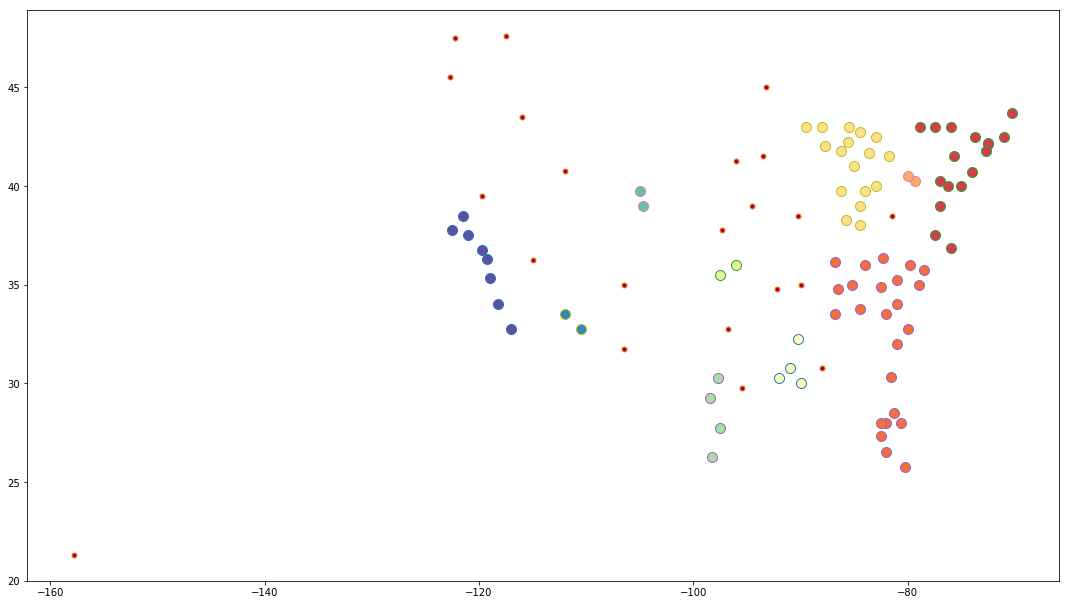

In [79]:
dbscanner(y, x, 2, 2)
print '250 km radius'

Silhouette Coefficient: 0.396
Estimated number of clusters: 6
Homogeneity: 0.165
Completeness: 0.788
V-measure: 0.273
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True False  True  True  True
  True  True  True  True  True  True  True False]


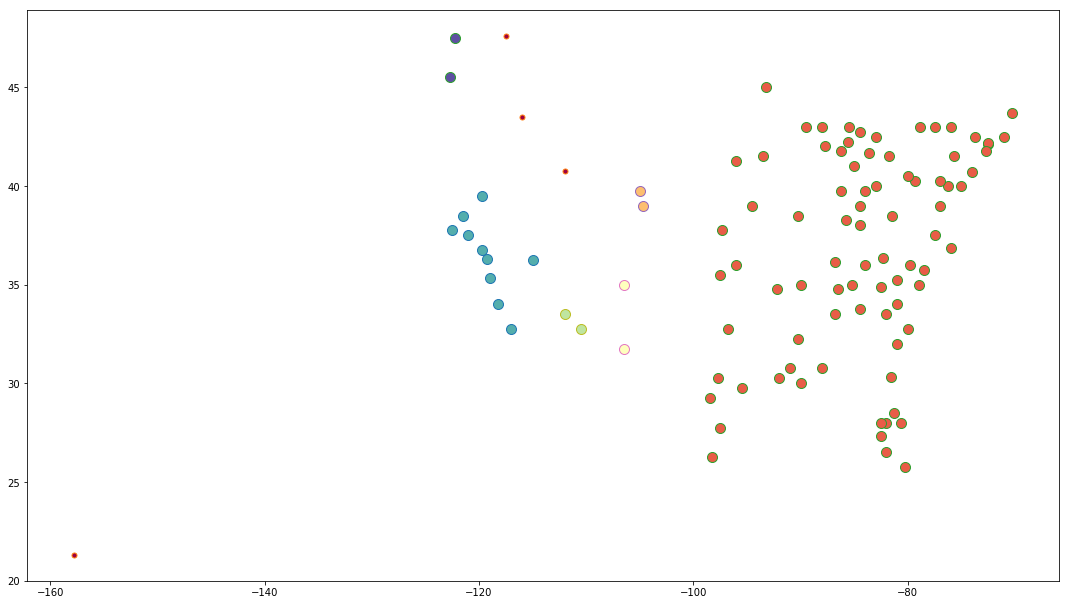

500 km radius


In [80]:
dbscanner(y, x, 4, 2)
print '500 km radius'